## Logistic Regression in Python
In this notebook, we will perform a logistic regression analysis using a synthetic dataset created with the `make_classification` function. We will:
1. Generate a dataset.
2. Visualize the dataset using a scatter plot.
3. Train a logistic regression model.
4. Evaluate the model using a confusion matrix.
5. Plot an ROC curve to visualize the model's performance.


### Step 1: Importing Libraries
We import the necessary libraries for generating the dataset (`make_classification`), building the logistic regression model (`LogisticRegression`), visualizing the data (`matplotlib`), and evaluating the model (`confusion_matrix`, `roc_curve`, `auc`).


In [1]:
# Step 1: Import necessary libraries
# We'll use pandas for data handling, matplotlib for visualization, and sklearn for generating the dataset and model building
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd


### Step 2: Generating and Visualizing Dataset
In this step, we generate a binary classification dataset using `make_classification` with one feature and two classes. We plot the data using a scatter plot, where each point represents an observation and its class is indicated by the color.


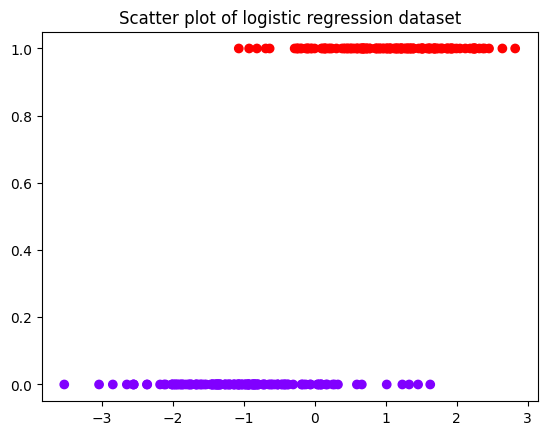

In [2]:
# Step 2: Generate the dataset
# We use make_classification to create a dataset with 1 feature, 2 classes, and 300 samples
x, y = make_classification(
    n_samples=300,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03, # 3% noise
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

# Visualize the generated dataset
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter plot of logistic regression dataset')
plt.show()


### Step 3: Splitting the Dataset
We split the dataset into training and test sets using a 50/50 split. The training set is used to train the logistic regression model, while the test set is used to evaluate its performance.


In [3]:
# Step 3: Splitting the dataset
# We split the dataset into a training set (50%) and a test set (50%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)


### Step 4: Training the Logistic Regression Model
Here, we create a logistic regression model and train it using the training set. The model learns coefficients and an intercept, which define the logistic function that separates the two classes.


In [4]:
# Step 4: Training the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Display the learned coefficients and intercept
print('Coefficients:', log_reg.coef_)
print('Intercept:', log_reg.intercept_)


Coefficients: [[2.15142297]]
Intercept: [0.05234855]


### Step 5: Making Predictions and Evaluating with Confusion Matrix
In this step, we use the trained model to make predictions on the test set. We evaluate the model's performance using a confusion matrix, which shows how many correct and incorrect predictions were made for each class.


In [5]:
# Step 5: Making predictions on the test set and evaluating the model
y_pred = log_reg.predict(x_test)

# Generate the confusion matrix to evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Create a DataFrame to compare actual vs predicted values
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comparison.head()


Confusion Matrix:
[[70 11]
 [ 5 64]]


,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1


### Step 6: Plotting the ROC Curve and Calculating AUC
We calculate and plot the Receiver Operating Characteristic (ROC) curve, which shows the trade-off between the true positive rate and the false positive rate. The Area Under the Curve (AUC) is a measure of how well the model distinguishes between classes, with a higher AUC indicating better performance.


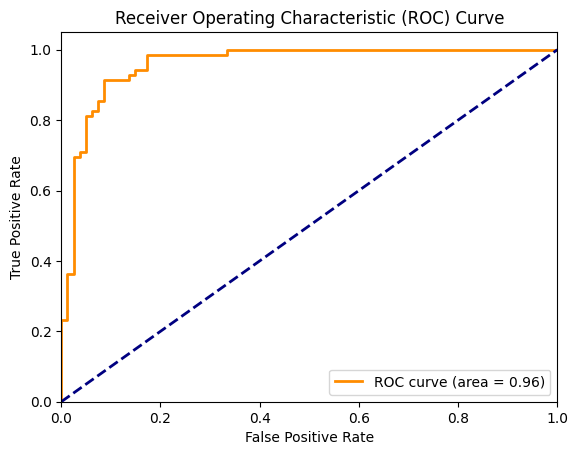

In [6]:
# Step 6: Plotting the ROC curve and calculating AUC
# Get predicted probabilities
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
